## CSV to Dataframe

In [4]:
import pandas as pd 
import numpy as np
from datetime import datetime

def csv_to_df(path):
    data = pd.read_csv(path)
    return data

df_PV_1 = csv_to_df('/Users/shong/Desktop/Plant_1_Generation_Data.csv')
df_PV_2 = csv_to_df('/Users/shong/Desktop/Plant_2_Generation_Data.csv')
df_weather_1 = csv_to_df('/Users/shong/Desktop/Plant_1_Weather_Sensor_Data.csv')
df_weather_2 = csv_to_df('/Users/shong/Desktop/Plant_2_Weather_Sensor_Data.csv')

## Data Representation

In [5]:
print('num of cols: ', df_PV_1.columns)
print('num of rows', df_PV_1.index)

num of cols:  Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')
num of rows RangeIndex(start=0, stop=68778, step=1)


In [6]:
df_PV_1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [7]:
print('num of cols: ', df_PV_2.columns)
print('num of rows', df_PV_2.index)

num of cols:  Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')
num of rows RangeIndex(start=0, stop=67698, step=1)


In [8]:
df_PV_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [9]:
print('num of cols: ', df_weather_1.columns)
print('num of rows', df_weather_1.index)

num of cols:  Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')
num of rows RangeIndex(start=0, stop=3182, step=1)


In [10]:
df_weather_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


## Data preprocessing

##### Dropping NaN values along with their respective indexes

In [11]:
df_weather_2.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [12]:
def remove_nan_values(data):
    if data.isnull().values.any() == True:
        data_drop = data.dropna() #drop NaN values
        data_drop_index = data_drop.reset_index(drop=True)
        return data_drop_index
    else:
        return data

## Datetime Preprocessing

In [13]:
datetime_values = []
for dt in df_PV_1.DATE_TIME.values:
    datetime_values.append(datetime.strptime(dt, '%d-%m-%Y %H:%M'))
    
df_PV_1['DATE_TIME'] = datetime_values

In [14]:
df_PV_1['DATE_TIME'] = df_PV_1['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_PV_1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [15]:
df_weather_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


seem like weather_2 has the same date time values as df_PV_2

#### Function to remove selected columns

1) Dropping variables which do not contribute to learning such PLANT_ID (assuming both plants have identical processes) 
2) Drop SOURCE_KEY for the weather datasets since one plant has only one sensor panel

In [16]:
def drop_columns(data, column_names):
    for name in column_names:
        data = data.drop([name], axis=1) #drop specific columns using the column_name
    return data

#removal of unique ID to facilitate machine learning 
df_PV_1 = drop_columns(df_PV_1, ['PLANT_ID', 'TOTAL_YIELD']) 
df_PV_2 = drop_columns(df_PV_2, ['PLANT_ID', 'TOTAL_YIELD']) 
df_weather_1 = drop_columns(df_weather_1, ['PLANT_ID', 'SOURCE_KEY']) 
df_weather_2 = drop_columns(df_weather_2, ['PLANT_ID', 'SOURCE_KEY']) 

### Number of inverters at a given time interval 

at each time interval, there are more than one inverters in each module and a few modules make the solar panel. 

In [17]:
df_PV_1[df_PV_1.DATE_TIME == '15-05-2020 00:00'].count()
print('a particular inverter at time 15-05-2020 00:00: is 21')

a particular inverter at time 15-05-2020 00:00: is 21


In [18]:
df_PV_1 = df_PV_1.groupby(df_PV_1.DATE_TIME)[['DC_POWER', 'AC_POWER', 'DAILY_YIELD']].agg('sum')
df_PV_1 = df_PV_1.reset_index()

In [19]:
df_PV_2 = df_PV_2.groupby(df_PV_2.DATE_TIME)[['DC_POWER', 'AC_POWER', 'DAILY_YIELD']].agg('sum')
df_PV_2 = df_PV_2.reset_index()

In [20]:
values_weather = list(df_weather_1.DATE_TIME.astype('string').values)
values_PV = list(df_PV_1.DATE_TIME.astype('string').values)
remove_list = []
for dt in values_weather:
    if dt not in values_PV:
        remove_list.append(dt)
for dt in remove_list:
    df_weather_1 =  df_weather_1[df_weather_1.DATE_TIME.str.contains(dt)==False]
print('length of mismatching values between the power and weather datasets: ', len(remove_list))

length of mismatching values between the power and weather datasets:  25


In [21]:
df_weather_1 = drop_columns(df_weather_1.reset_index(), ['index'])
df_weather_1

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0
...,...,...,...,...
3152,2020-06-17 22:45:00,22.150570,21.480377,0.0
3153,2020-06-17 23:00:00,22.129816,21.389024,0.0
3154,2020-06-17 23:15:00,22.008275,20.709211,0.0
3155,2020-06-17 23:30:00,21.969495,20.734963,0.0


In [22]:
df_1 = pd.merge(df_PV_1, df_weather_1, on='DATE_TIME')
df_1

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.000000,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.000000,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.000000,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.000000,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.000000,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...
3152,2020-06-17 22:45:00,0.0,0.0,129571.000000,22.150570,21.480377,0.0
3153,2020-06-17 23:00:00,0.0,0.0,129571.000000,22.129816,21.389024,0.0
3154,2020-06-17 23:15:00,0.0,0.0,129571.000000,22.008275,20.709211,0.0
3155,2020-06-17 23:30:00,0.0,0.0,129571.000000,21.969495,20.734963,0.0


In [23]:
values_weather = list(df_weather_2.DATE_TIME.astype('string').values)
values_PV = list(df_PV_2.DATE_TIME.astype('string').values)
remove_list = []
for dt in values_weather:
    if dt not in values_PV:
        remove_list.append(dt)
for dt in remove_list:
    df_weather_2 =  df_weather_2[df_weather_2.DATE_TIME.str.contains(dt)==False]
print('length of mismatching values between the power and weather datasets: ', len(remove_list))

length of mismatching values between the power and weather datasets:  0


In [24]:
df_2 = pd.merge(df_PV_2, df_weather_2, on='DATE_TIME')
df_2

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,26.596148,25.088210,0.0
...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000,23.291048,22.373909,0.0


In [25]:
df = pd.concat([df_1, df_2], ignore_index=True)
df

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.0,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.0,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.0,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.0,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.0,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...
6411,2020-06-17 22:45:00,0.0,0.0,93040.0,23.511703,22.856201,0.0
6412,2020-06-17 23:00:00,0.0,0.0,93040.0,23.482282,22.744190,0.0
6413,2020-06-17 23:15:00,0.0,0.0,93040.0,23.354743,22.492245,0.0
6414,2020-06-17 23:30:00,0.0,0.0,93040.0,23.291048,22.373909,0.0


#### Export DF to CSV

In [26]:
df.to_csv('/Users/shong/Desktop/data.csv', encoding='utf-8')

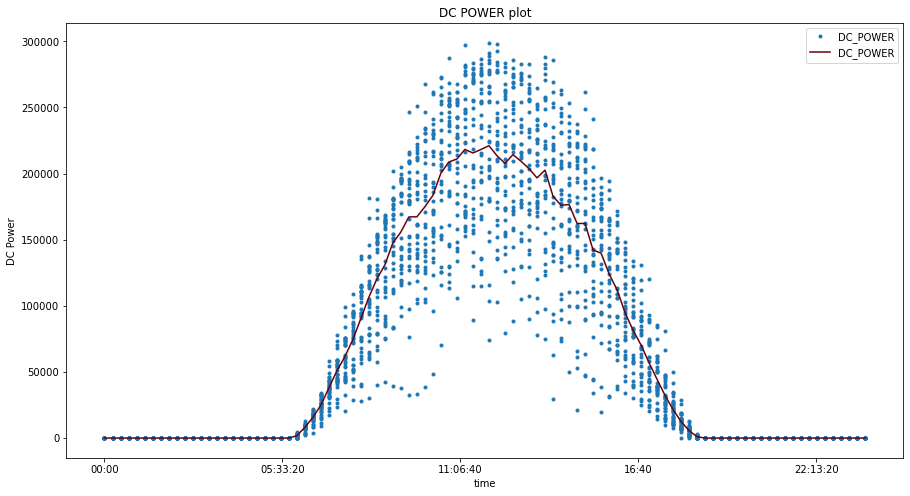

In [123]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

df_PV_1['DATE_TIME'] = pd.to_datetime(df_PV_1['DATE_TIME'], errors='coerce')
df_PV_1['time'] = df_PV_1['DATE_TIME'].dt.time
df_PV_1['date'] = pd.to_datetime(df_PV_1['DATE_TIME'].dt.date)

df_PV_1.plot(x= 'time', y='DC_POWER', style='.', figsize = (15, 8))
df_PV_1.groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

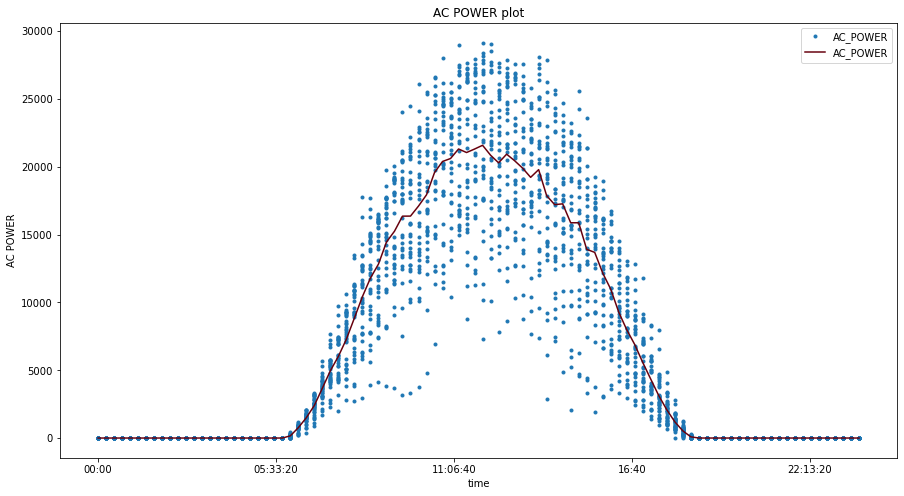

In [28]:
df_PV_1.plot(x= 'time', y='AC_POWER', style='.', figsize = (15, 8))
df_PV_1.groupby('time')['AC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('AC POWER')
plt.title('AC POWER plot')
plt.show()

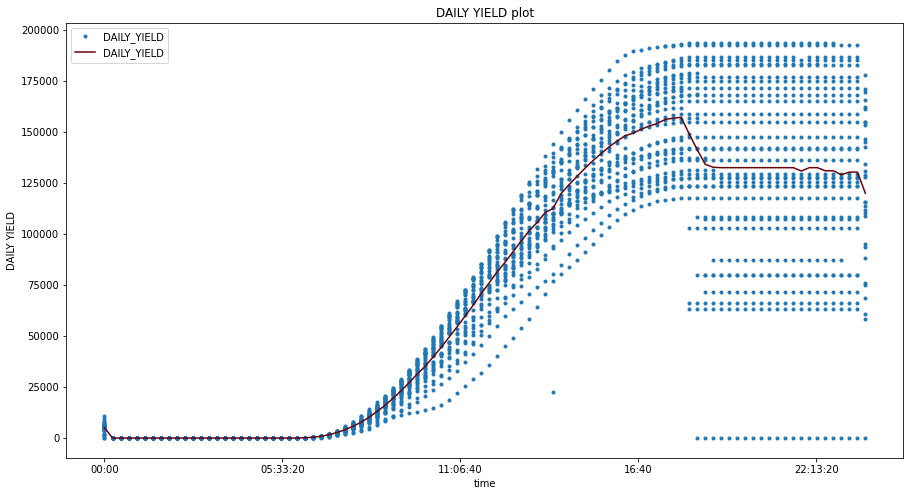

In [30]:
df_PV_1.plot(x= 'time', y='DAILY_YIELD', style='.', figsize = (15, 8))
df_PV_1.groupby('time')['DAILY_YIELD'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DAILY YIELD')
plt.title('DAILY YIELD plot')
plt.show()

In [31]:
df_weather_1['DATE_TIME'] = pd.to_datetime(df_weather_1['DATE_TIME'], errors='coerce')
df_weather_1['time'] = df_weather_1['DATE_TIME'].dt.time
df_weather_1['date'] = pd.to_datetime(df_weather_1['DATE_TIME'].dt.date)

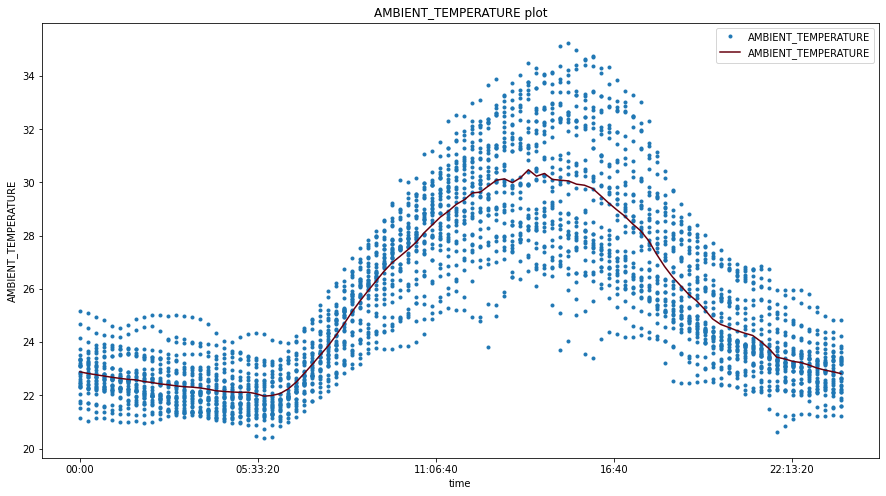

In [32]:
df_weather_1.plot(x= 'time', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 8))
df_weather_1.groupby('time')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('AMBIENT_TEMPERATURE')
plt.title('AMBIENT_TEMPERATURE plot')
plt.show()

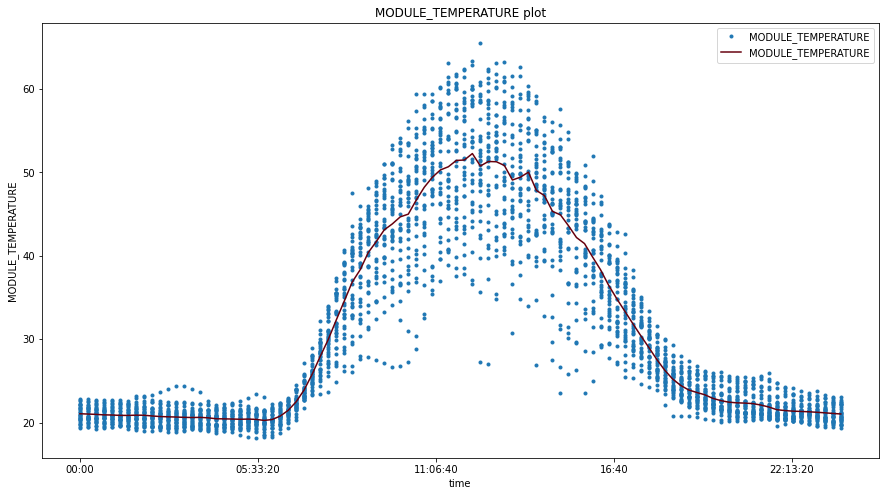

In [33]:
df_weather_1.plot(x= 'time', y='MODULE_TEMPERATURE', style='.', figsize = (15, 8))
df_weather_1.groupby('time')['MODULE_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('MODULE_TEMPERATURE')
plt.title('MODULE_TEMPERATURE plot')
plt.show()